In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

In [2]:
df = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/cc35e5628f3a2988c98dbca1b8b5969c/asset-v1:ITMOUniversity+MLDATAN+spring_2023_ITMO_bac+type@asset+block/electricity_train.csv')

In [3]:
df.describe()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
count,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000
mean,0.498293,4.006566,0.500560,0.057828,0.425939,0.003455,0.423024,0.500243,0.424536
std,0.339907,1.993551,0.294998,0.039052,0.163390,0.010175,0.120600,0.153098,0.494279
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031945,2.000000,0.255319,0.035187,0.309729,0.002283,0.373382,0.414912,0.000000
50%,0.456263,4.000000,0.510638,0.048787,0.444213,0.003467,0.422915,0.414912,0.000000
75%,0.880492,6.000000,0.765957,0.074457,0.536745,0.003467,0.468669,0.605263,1.000000
max,1.000000,7.000000,1.000000,1.000000,0.980809,1.000000,1.000000,0.959211,1.000000


Введите долю элементов класса 1.

In [4]:
df.groupby('class')['class'].count()/df.shape[0]

class
0    0.575464
1    0.424536
Name: class, dtype: float64

Постройте матрицу корреляций.

Перечислите через запятую и пробел пару наиболее коррелированных переменных.

<Axes: >

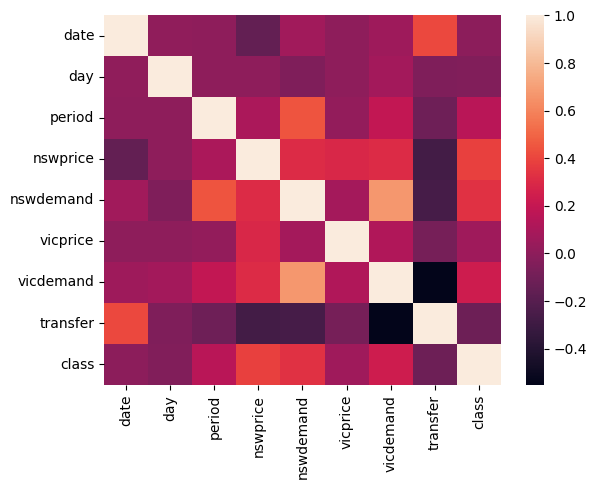

In [ ]:
sns.heatmap(df.corr())

vicdemand, nswdemand

date


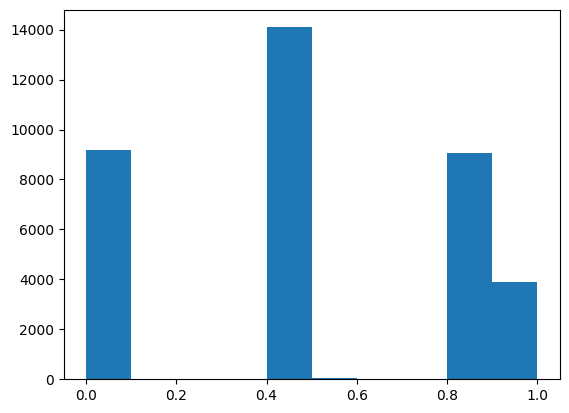

day


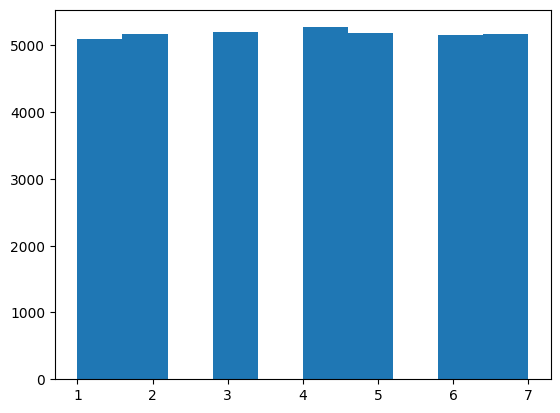

period


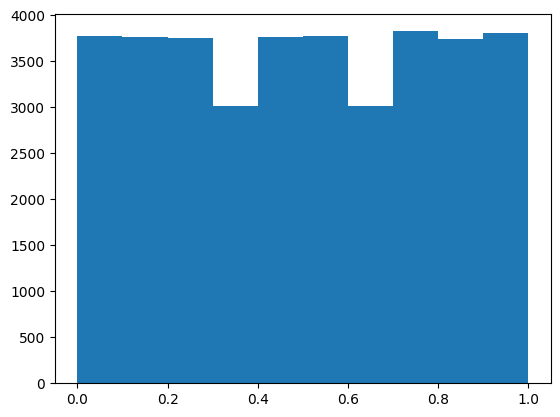

nswprice


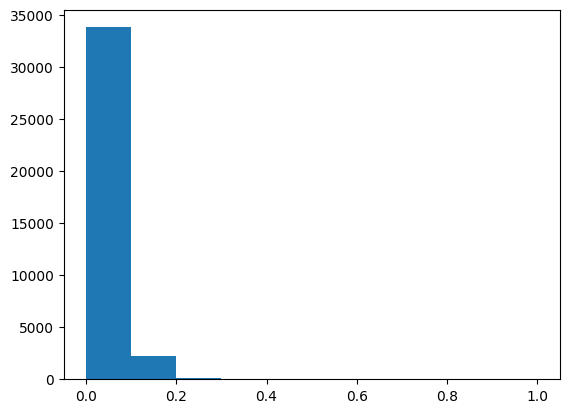

nswdemand


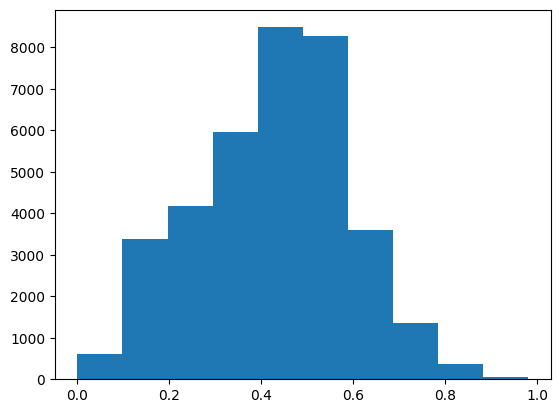

vicprice


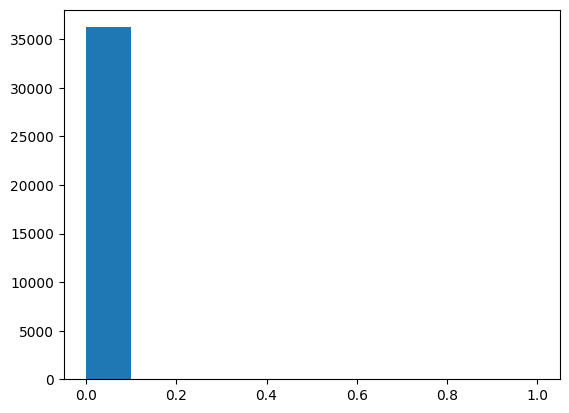

vicdemand


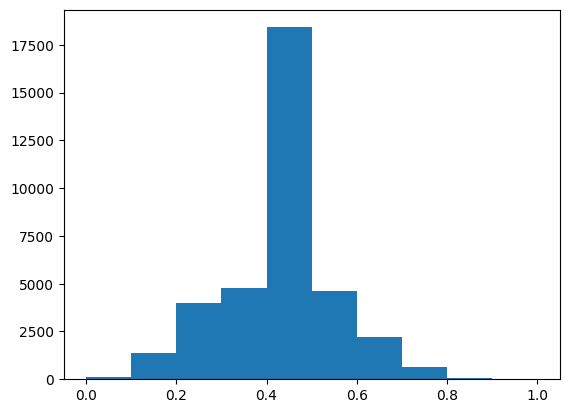

transfer


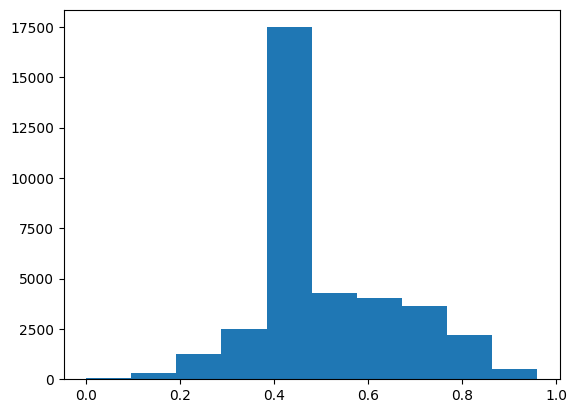

class


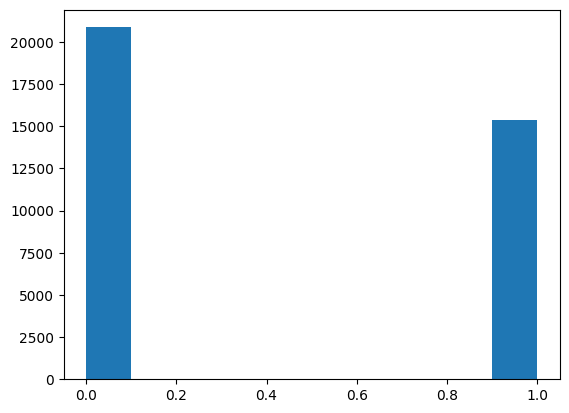

In [5]:
for col in df.columns:
  print(col)
  plt.hist(df[col])
  plt.show()

При помощи train_test_split разбейте полученный набор данных на тренировочную и тестовую выборки со следующими параметрами: test_size=0.2, random_state=21

In [50]:
random_state = 11

In [51]:
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=random_state
                                                    )

2. Random Forests Classifier

Обучите модель sklearn.ensemble.RandomForestClassifier на тренировочных данных со следующими параметрами: random_state=21. Постройте classification_report полученной модели на тренировочных данных.

Замечание: количество отображамых знаков после запятой в classification_report регулируется параметром digits. По умолчанию отображается лишь  знака после запятой.

Введите значение точности модели на тренировочных данных.

In [52]:
forest = RandomForestClassifier(random_state=random_state)

In [53]:
forest.fit(X_train, y_train)
predictions = forest.predict(X_test)

Введите значение точности модели на тренировочных данных.

In [54]:
predictions_train = forest.predict(X_train)

In [55]:
print(classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.909     0.926     0.918      4192
           1      0.896     0.873     0.884      3058

    accuracy                          0.904      7250
   macro avg      0.903     0.900     0.901      7250
weighted avg      0.904     0.904     0.904      7250



In [56]:
print(classification_report(y_train, predictions_train, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     16668
           1      1.000     1.000     1.000     12331

    accuracy                          1.000     28999
   macro avg      1.000     1.000     1.000     28999
weighted avg      1.000     1.000     1.000     28999



Добавление к лесу деревьев GridSearchCV.

При помощи sklearn.model_selection.GridSearchCV обучите RandomForestClassifier на тренировочных данных со следующими параметрами:

In [57]:
params_grid = {'n_estimators': [100,300,500],
  'max_leaf_nodes': list(range(6,10)),
  'min_samples_leaf': [1,2,3]}

In [58]:
gs = GridSearchCV(RandomForestClassifier(
    bootstrap=False,
    class_weight='balanced',
    n_jobs=-1,
    max_features='sqrt',
    random_state=random_state),
    params_grid,
    verbose=4,
    cv=3)

In [59]:
gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100;, score=0.774 total time=   3.0s
[CV 2/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100;, score=0.766 total time=   1.2s
[CV 3/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100;, score=0.770 total time=   1.2s
[CV 1/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300;, score=0.773 total time=   3.5s
[CV 2/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300;, score=0.770 total time=   4.3s
[CV 3/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300;, score=0.773 total time=   4.2s
[CV 1/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=500;, score=0.773 total time=   5.8s
[CV 2/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=500;, score=0.771 total time=   7.3s
[CV 3/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=500;, score=0.774 total time=   5.8s
[CV 1/3] END max_leaf_nodes=6

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(bootstrap=False,
                                              class_weight='balanced',
                                              n_jobs=-1, random_state=11),
             param_grid={'max_leaf_nodes': [6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [100, 300, 500]},
             verbose=4)

In [60]:
gs.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       max_leaf_nodes=9, n_jobs=-1, random_state=11)

In [61]:
gs.best_params_

{'max_leaf_nodes': 9, 'min_samples_leaf': 1, 'n_estimators': 100}

In [62]:
best_forest = gs.best_estimator_

In [63]:
best_forest.fit(X_train, y_train)
predictions_train = best_forest.predict(X_train)
predictions = best_forest.predict(X_test)

In [64]:
print(classification_report(y_train, predictions_train, digits=3))

              precision    recall  f1-score   support

           0      0.778     0.878     0.825     16668
           1      0.800     0.662     0.724     12331

    accuracy                          0.786     28999
   macro avg      0.789     0.770     0.775     28999
weighted avg      0.787     0.786     0.782     28999



In [65]:
print(classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.784     0.873     0.826      4192
           1      0.794     0.671     0.727      3058

    accuracy                          0.788      7250
   macro avg      0.789     0.772     0.777      7250
weighted avg      0.788     0.788     0.784      7250



In [66]:
pd.DataFrame(best_forest.feature_importances_, best_forest.feature_names_in_)

,0
date,0.054839
day,0.012206
period,0.084642
nswprice,0.521986
nswdemand,0.148809
vicprice,0.128893
vicdemand,0.040046
transfer,0.008580


Используйте объект sklearn.ensemble.VotingClassifier с параметром voting='hard'. В качестве базовых алгоритмов используйте следующие классификаторы с соответствующими параметрами:LogisticRegression(solver='liblinear', random_state=21), SVC(random_state=21), SGDClassifier(random_state=21). Обучите модель на тренировочных данных.

Постройте classification_report полученной модели на тестовых данных.

Введите значение точности модели на тестовых данных.

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [68]:
LogReg = LogisticRegression(solver='liblinear', random_state=random_state)
svc = SVC(random_state=random_state)
sgdc = SGDClassifier(random_state=random_state)

In [69]:
vc = VotingClassifier(estimators=[('logr', LogReg), ('svc', svc), ('sgdc', sgdc)], voting='hard')

In [70]:
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('logr',
                              LogisticRegression(random_state=11,
                                                 solver='liblinear')),
                             ('svc', SVC(random_state=11)),
                             ('sgdc', SGDClassifier(random_state=11))])

In [71]:
predictions = vc.predict(X_test)

In [72]:
print(classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.751     0.875     0.808      4192
           1      0.778     0.602     0.679      3058

    accuracy                          0.760      7250
   macro avg      0.765     0.739     0.744      7250
weighted avg      0.762     0.760     0.754      7250



На основе sklearn.ensemble.BaggingClassifier, используя DecisionTreeClassifier, обучите на тренировочных данных модель со следующими параметрами:

BaggingClassifier(
    DecisionTreeClassifier(class_weight='balanced'),
    max_samples=0.5,
    max_features=0.5,
    bootstrap=False,
  random_state=21)
Постройте classification_report полученной модели на тестовых данных.

In [73]:
from sklearn.ensemble import BaggingClassifier

from sklearn.tree import DecisionTreeClassifier

In [74]:
bagging = BaggingClassifier(
    DecisionTreeClassifier(class_weight='balanced'),
    max_samples=0.5,
    max_features=0.5,
    bootstrap=False,
    random_state=random_state)

In [75]:
bagging.fit(X_train, y_train)

predictions = bagging.predict(X_test)
print(classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.859     0.911     0.885      4192
           1      0.868     0.796     0.830      3058

    accuracy                          0.863      7250
   macro avg      0.864     0.854     0.857      7250
weighted avg      0.863     0.863     0.862      7250



5. Gradient Boosting Classifier

Обучите модель sklearn.ensemble.GradientBoostingClassifier на тренировочных данных со следующими параметрами: n_estimators=500, learning_rate=0.8, random_state=21, max_depth=2.

Постройте classification_report полученной модели на тестовых данных.

Введите значение точности модели на тестовых данных.

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

In [77]:
gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=0.8, random_state=random_state, max_depth=2)

In [78]:
gbc.fit(X_train, y_train)
predictions = gbc.predict(X_test)
print(classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.884     0.895     0.889      4192
           1      0.853     0.839     0.846      3058

    accuracy                          0.871      7250
   macro avg      0.869     0.867     0.868      7250
weighted avg      0.871     0.871     0.871      7250



6. AdaBoost Classifier

На основе sklearn.ensemble.AdaBoostClassifier, используя DecisionTreeClassifier, обучите на тренировочных данных модель со следующими параметрами:

AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3, class_weight='balanced'),
    n_estimators=300,
    learning_rate=0.5,
    random_state=21)
Постройте classification_report полученной модели на тестовых данных.

In [79]:
from sklearn.ensemble import AdaBoostClassifier

In [94]:
ada = AdaBoostClassifier(
      base_estimator=DecisionTreeClassifier(max_depth=3, class_weight='balanced'),
      n_estimators=300,
      learning_rate=0.5,
      random_state=random_state)

In [95]:
ada

AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    max_depth=3),
                   learning_rate=0.5, n_estimators=300, random_state=11)

In [97]:
ada.fit(X_train, y_train)
predictions = ada.predict(X_test)
print(classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.928     0.903     0.915      4192
           1      0.872     0.904     0.888      3058

    accuracy                          0.903      7250
   macro avg      0.900     0.903     0.901      7250
weighted avg      0.904     0.903     0.904      7250



7. Stacking Classifier

Обучите модель на основе sklearn.ensemble.StackingClassifier. Базовые алгоритмы: RandomForestClassifier(random_state=21), SVC(random_state=21). Решающий: LogisticRegression(random_state=21).

Постройте classification_report полученной модели на тестовых данных.

Введите значение точности модели на тестовых данных.

In [82]:
from sklearn.ensemble import StackingClassifier

In [83]:
rand_forest = RandomForestClassifier(random_state=random_state)
svc = SVC(random_state=random_state)
logr = LogisticRegression(random_state=random_state)

In [84]:
sc = StackingClassifier(estimators=[
    ('forest', rand_forest),
    ('svc', svc)], final_estimator=logr)

In [85]:
sc.fit(X_train, y_train)

StackingClassifier(estimators=[('forest',
                                RandomForestClassifier(random_state=11)),
                               ('svc', SVC(random_state=11))],
                   final_estimator=LogisticRegression(random_state=11))

In [86]:
predictions = sc.predict(X_test)
print(classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.913     0.921     0.917      4192
           1      0.891     0.880     0.885      3058

    accuracy                          0.904      7250
   macro avg      0.902     0.901     0.901      7250
weighted avg      0.904     0.904     0.904      7250



## Предсказания

In [87]:
data_test = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/56cfeca117922281d5203b4c962ee82d/asset-v1:ITMOUniversity+MLDATAN+spring_2023_ITMO_bac+type@asset+block/electricity_reserved.csv')

In [88]:
data_test

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer
0,0.881111,3,0.595745,0.035937,0.527968,0.002443,0.545054,0.391667
1,0.898854,7,0.744681,0.084514,0.529902,0.005399,0.449249,0.664474
2,0.452015,4,0.000000,0.040891,0.591639,0.002833,0.449508,0.491667
3,0.446706,3,0.893617,0.069893,0.623921,0.004701,0.486277,0.586842
4,0.890005,2,0.914894,0.027441,0.577060,0.001901,0.528742,0.419298
...,...,...,...,...,...,...,...,...
9058,0.876421,1,0.148936,0.018284,0.097888,0.000816,0.174262,0.841667
9059,0.871731,4,0.936170,0.048547,0.447932,0.003278,0.437856,0.573684
9060,0.027565,6,0.042553,0.052150,0.206486,0.003467,0.422915,0.414912
9061,0.000442,5,0.446809,0.149634,0.545076,0.003467,0.422915,0.414912


In [89]:
gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=0.8, random_state=21, max_depth=5)

In [90]:
gbc.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
predictions = gbc.predict(data_test)

In [ ]:
predictions = pd.DataFrame(predictions)

In [ ]:
predictions.transpose().to_csv(r'/content/predict.csv', index= False)